<a href="https://colab.research.google.com/github/AnovaYoung/Bias-Mitigation-in-Loan-Data/blob/main/Copy_of_AYoungers_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/Users/anovayoungers/Downloads/assignment 2/train_data.csv'  # Update this to the path where your file is stored
train_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(train_data.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             1          157500.0    900000.0      26446.5   
1               Y             1           90000.0    733176.0      21438.0   
2               Y             0          189000.0   1795500.0      62541.0   
3               N             0          175500.0    494550.0      45490.5   
4               Y             0          270000.0   1724688.0      54283.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/anovayoungers/Downloads/assignment 2/train_data.csv')



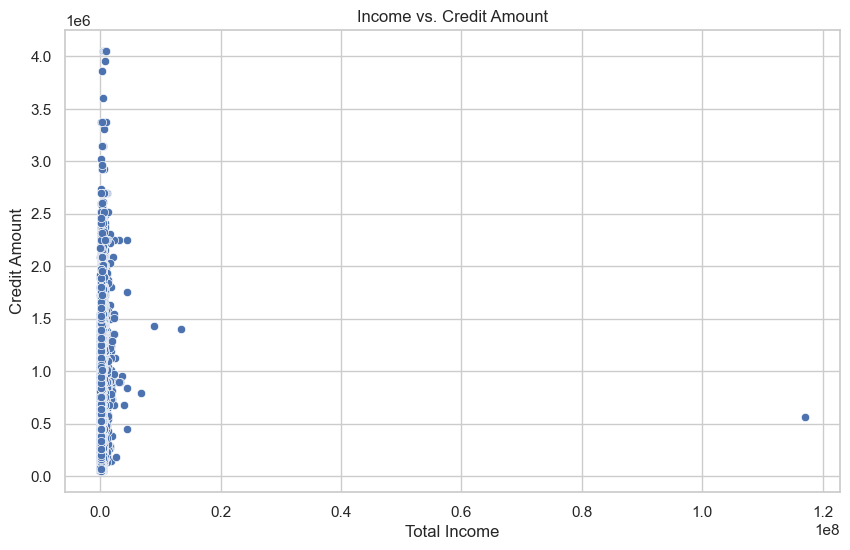

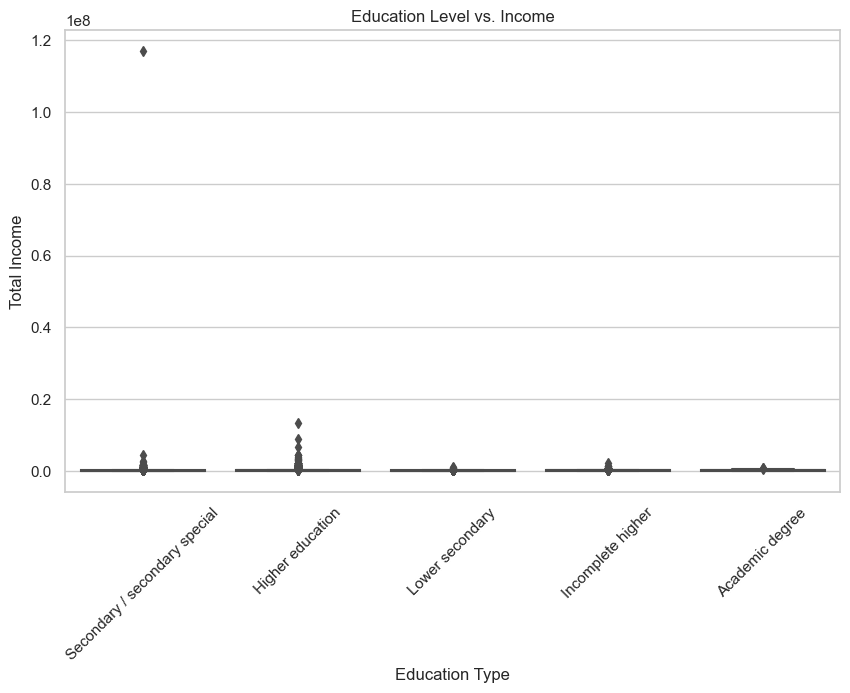

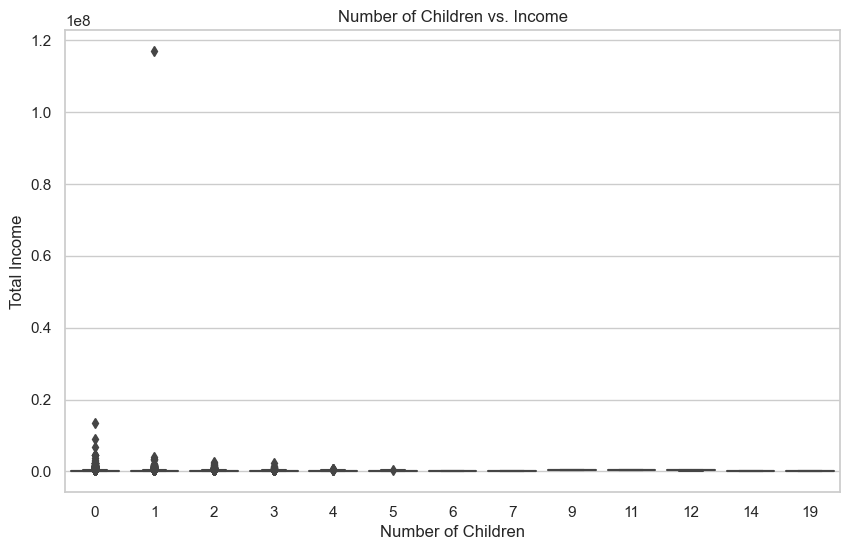

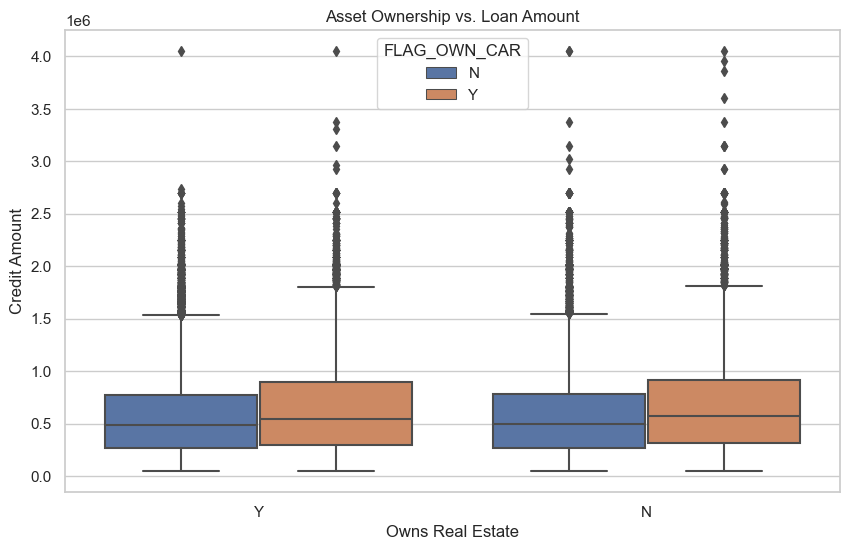

In [ ]:
sns.set(style="whitegrid")

# Comparing Income vs Credit Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df)
plt.title('Income vs. Credit Amount')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.show()


# education Level vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=df)
plt.title('Education Level vs. Income')
plt.xlabel('Education Type')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()

# Number of Children v Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', data=df)
plt.title('Number of Children vs. Income')
plt.xlabel('Number of Children')
plt.ylabel('Total Income')
plt.show()

# ownership of Real Estate or Car vs Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='FLAG_OWN_REALTY', y='AMT_CREDIT', hue='FLAG_OWN_CAR', data=df)
plt.title('Asset Ownership vs. Loan Amount')
plt.xlabel('Owns Real Estate')
plt.ylabel('Credit Amount')
plt.show()


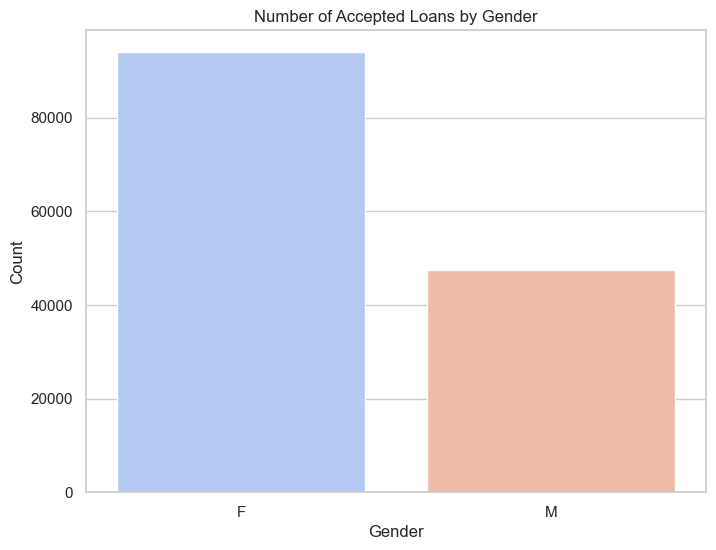

In [ ]:
accepted_loans = df[df['TARGET'] == 0]

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='CODE_GENDER', data=accepted_loans, palette='coolwarm')
plt.title('Number of Accepted Loans by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


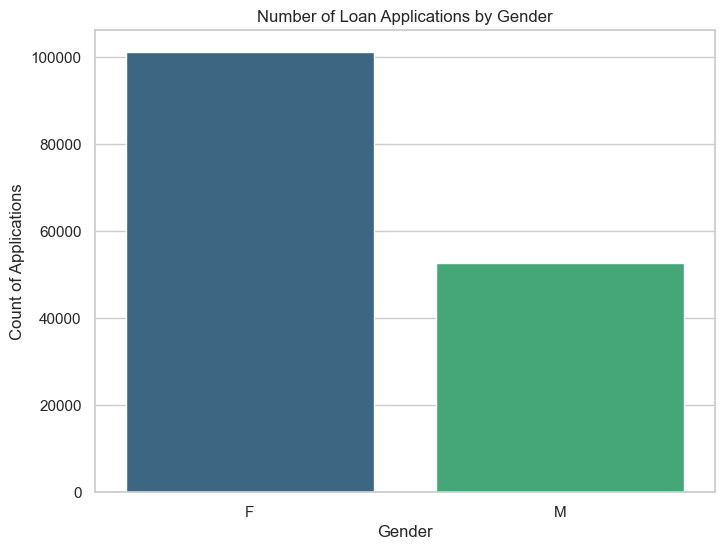

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CODE_GENDER', data=df, palette='viridis')  # Using the 'viridis' palette for a colorful output
plt.title('Number of Loan Applications by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Applications')
plt.show()


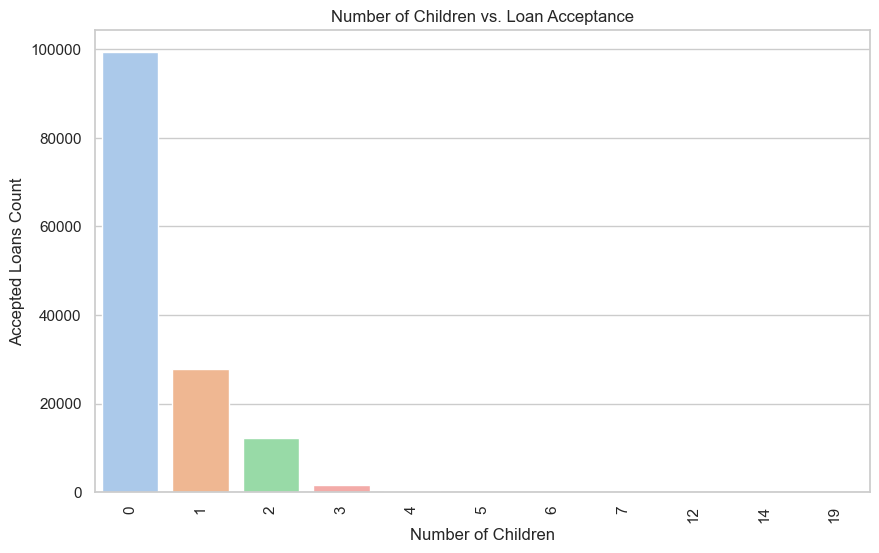

In [ ]:
# Filtering for accepted loans
accepted_loans = df[df['TARGET'] == 0]

# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='CNT_CHILDREN', data=accepted_loans, palette='pastel')
plt.title('Number of Children vs. Loan Acceptance')
plt.xlabel('Number of Children')
plt.ylabel('Accepted Loans Count')
plt.xticks(rotation=90)  # im going to rotate the x-axis labels for better visibility
plt.show()


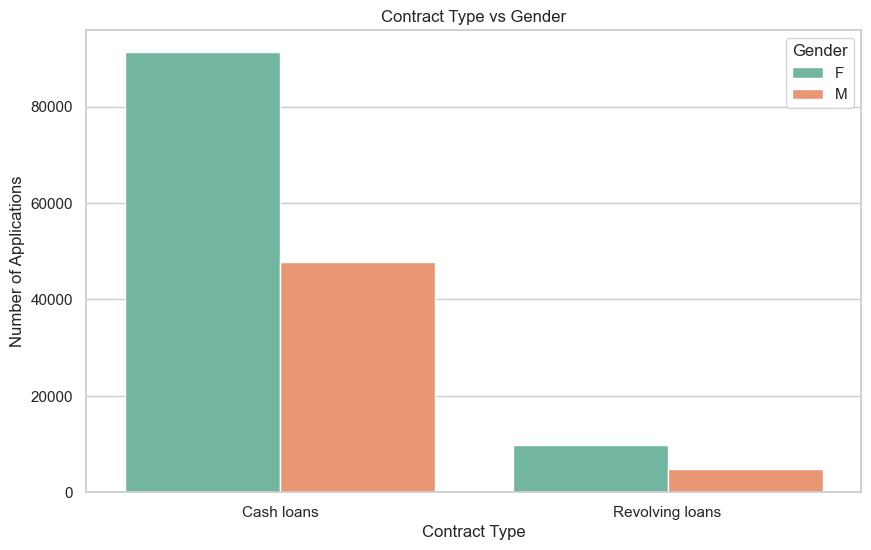

In [ ]:
#grouped bar chart

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df, palette='Set2')
plt.title('Contract Type vs Gender')
plt.xlabel('Contract Type')
plt.ylabel('Number of Applications')
plt.legend(title='Gender')
plt.show()


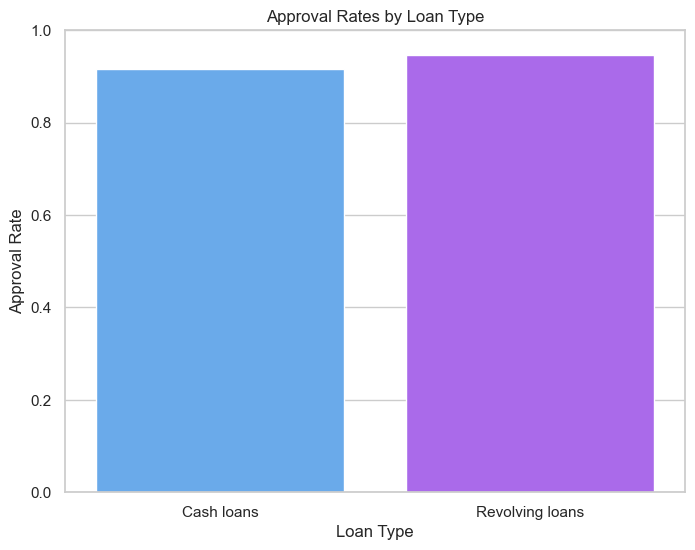

In [ ]:
# grouping by contract type and target, then count occurrences
loan_approval_rates = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Calculate approval rates
loan_approval_rates['Approval Rate'] = loan_approval_rates[0] / (loan_approval_rates[0] + loan_approval_rates[1])

plt.figure(figsize=(8, 6))
sns.barplot(x=loan_approval_rates.index, y=loan_approval_rates['Approval Rate'], palette='cool')
plt.title('Approval Rates by Loan Type')
plt.ylabel('Approval Rate')
plt.xlabel('Loan Type')
plt.ylim(0, 1)
plt.show()

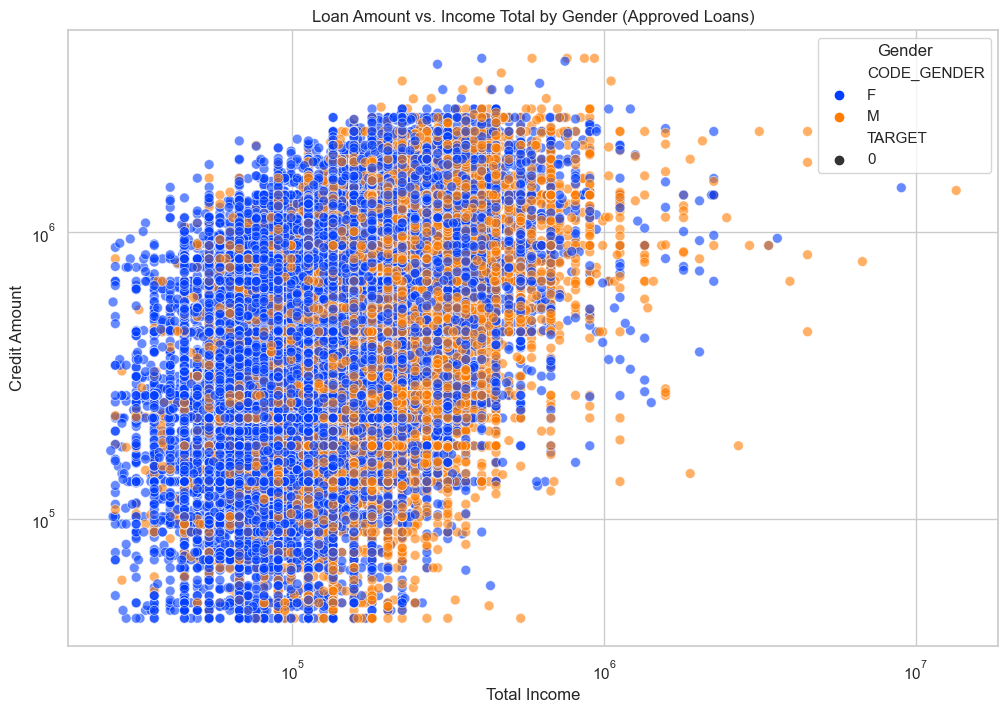

In [ ]:
#target variabe
approved_loans = df[df['TARGET'] == 0]

# create a scatter plot of income vs approval, colored by gender
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='CODE_GENDER', data=approved_loans,
                style='TARGET', palette='bright', alpha=0.6, edgecolor='w', s=50)
plt.title('Loan Amount vs. Income Total by Gender (Approved Loans)')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.xscale('log')  # Using log scale for better visualization
plt.yscale('log')  # same for credit amount
plt.grid(True)
plt.legend(title='Gender')
plt.show()


Hard to see so I'm going to do a Hexbin plot which groups points into hexagonal bins and can show the concentration of data a bit more clearly.

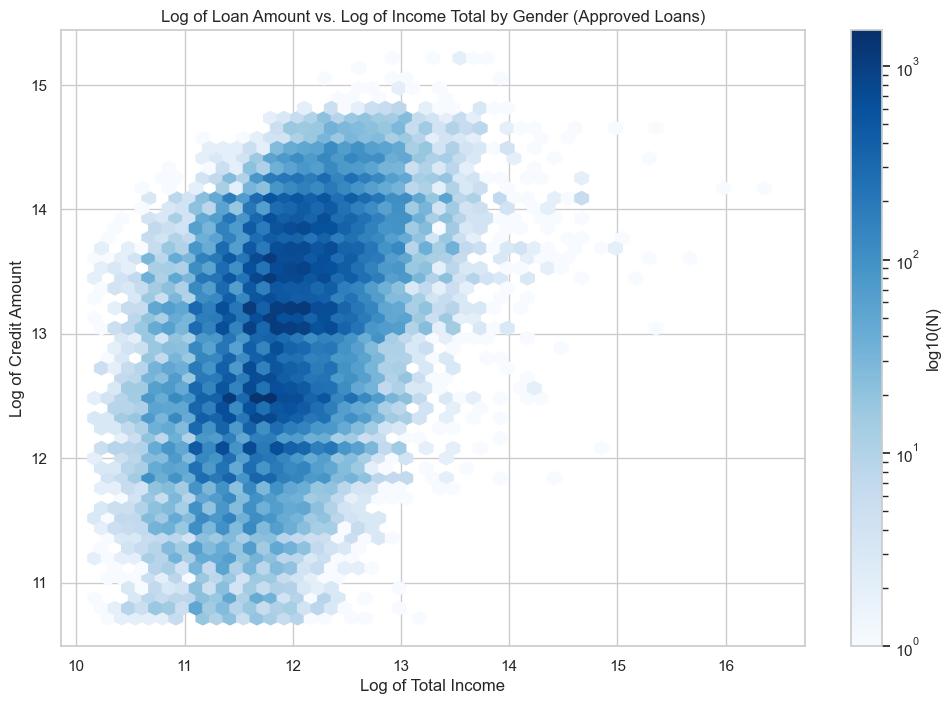

In [ ]:
import numpy as np

plt.figure(figsize=(12, 8))

income_log = np.log1p(approved_loans['AMT_INCOME_TOTAL'])
credit_log = np.log1p(approved_loans['AMT_CREDIT'])

plt.hexbin(income_log, credit_log, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Log of Loan Amount vs. Log of Income Total by Gender (Approved Loans)')
plt.xlabel('Log of Total Income')
plt.ylabel('Log of Credit Amount')
plt.show()


Not that much more clear.

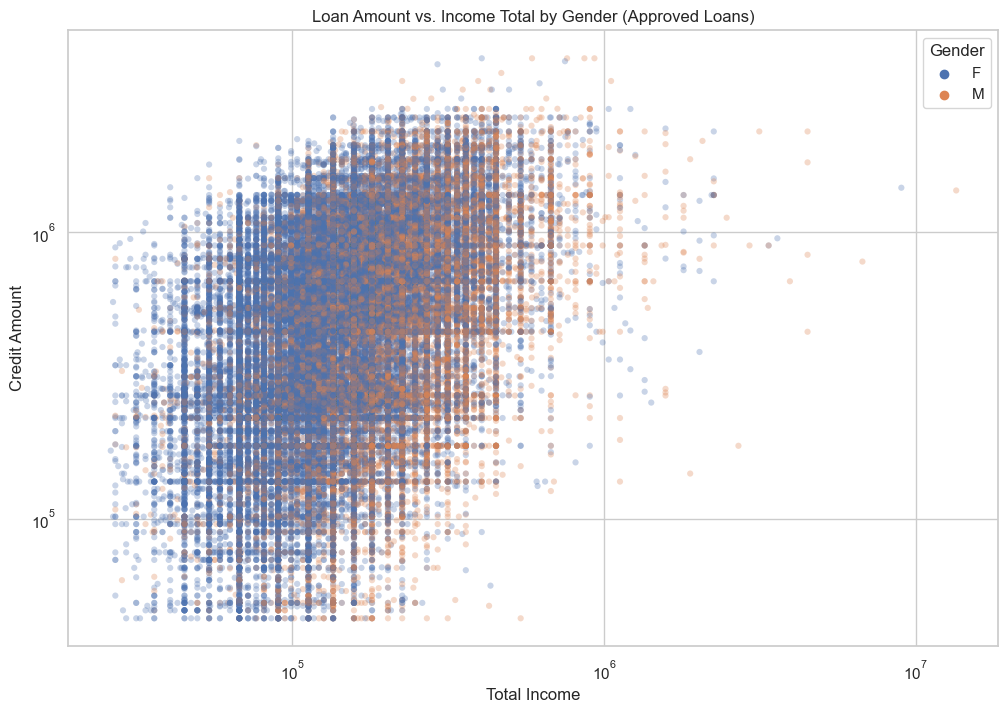

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='CODE_GENDER', data=approved_loans,
                alpha=0.3, edgecolor='none', s=20)  # Reduced size and increased transparency
plt.title('Loan Amount vs. Income Total by Gender (Approved Loans)')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend(title='Gender')
plt.show()
